# Introduction to Python 
# Homework #7
- Due Monday Sat Nov 17 at 11pm
- This homework will be graded
- You MUST submit on CourseWorks2 before it closes
    - Verify your submission succeeded
    - Email submissions are not accepted 
    

# Academic Honesty
* The computer science department has strict polices. Check
the department [web page](http://www.cs.columbia.edu/education/honesty) for details. 
- Do not look at anybody else's source code. Do not show anybody
your source, or leave your source where somebody could see it.
You MUST write your own code.
- For this class, feel free to discuss issues with other people, but suggest waiting an hour or two after a discussion, before writing your code.
-  Cases of non original source will be refered to the Judical Committee.



# Problems 1, 2 - Right Triangles
- hints - you might want to use:
    - [itertools.combinations](https://docs.python.org/3.6/library/itertools.html#itertools.combinations)
    - [itertools.product](https://docs.python.org/3.6/library/itertools.html#itertools.product) with 'repeat=2' arg
    - [numpy.dot](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html)
    - toplevel max, min functions

# define makeXYPoints
- makes all possible xy points given a list of coordinates
- a point should be represented as a 1D numpy array

In [9]:
import itertools
import numpy as np

In [30]:
def makeXYPoints(array):
    result = []
    products = itertools.product(array, repeat=2)
    for product in products:
        result.append(np.array(product))
    return result

In [31]:
makeXYPoints([0,1])

[array([0, 0]), array([0, 1]), array([1, 0]), array([1, 1])]

In [32]:
# use these 9 points for rest of problem

pts = makeXYPoints([0,1,2])
pts

[array([0, 0]),
 array([0, 1]),
 array([0, 2]),
 array([1, 0]),
 array([1, 1]),
 array([1, 2]),
 array([2, 0]),
 array([2, 1]),
 array([2, 2])]

# Triangles
- triangles are made from three points
    - one is always the origin(0,0)
    - the other two are chosen from 'pts' above

# define makePairs
- make all possible pairs of makePoints() points

In [37]:
def makePairs(pts):
    return list(itertools.combinations(pts, 2))

In [38]:
pairs = makePairs(pts)
print(len(pairs))
pairs

36


[(array([0, 0]), array([0, 1])),
 (array([0, 0]), array([0, 2])),
 (array([0, 0]), array([1, 0])),
 (array([0, 0]), array([1, 1])),
 (array([0, 0]), array([1, 2])),
 (array([0, 0]), array([2, 0])),
 (array([0, 0]), array([2, 1])),
 (array([0, 0]), array([2, 2])),
 (array([0, 1]), array([0, 2])),
 (array([0, 1]), array([1, 0])),
 (array([0, 1]), array([1, 1])),
 (array([0, 1]), array([1, 2])),
 (array([0, 1]), array([2, 0])),
 (array([0, 1]), array([2, 1])),
 (array([0, 1]), array([2, 2])),
 (array([0, 2]), array([1, 0])),
 (array([0, 2]), array([1, 1])),
 (array([0, 2]), array([1, 2])),
 (array([0, 2]), array([2, 0])),
 (array([0, 2]), array([2, 1])),
 (array([0, 2]), array([2, 2])),
 (array([1, 0]), array([1, 1])),
 (array([1, 0]), array([1, 2])),
 (array([1, 0]), array([2, 0])),
 (array([1, 0]), array([2, 1])),
 (array([1, 0]), array([2, 2])),
 (array([1, 1]), array([1, 2])),
 (array([1, 1]), array([2, 0])),
 (array([1, 1]), array([2, 1])),
 (array([1, 1]), array([2, 2])),
 (array([1

# define sidelensq
- computes the euclidean length squared between two points(there is no need to take a square root)
- use vector operators and methods - don't unpack to x,y

In [39]:
def sidelensq(pt1, pt2):
    diff = pt1 - pt2
    return np.dot(diff, diff)

In [40]:
[pts[1], pts[6], sidelensq(pts[1], pts[6])]

[array([0, 1]), array([2, 0]), 5]

In [41]:
[pts[7], pts[8], sidelensq(pts[7], pts[8])]

[array([2, 1]), array([2, 2]), 1]

# define right
- the two point arguments and the origin define the three points of a triangle
- if triangle is a right triangle, return True, otherwise False
- a right triangle will satisfy the pythagorean theorem(```a**2 + b**2 == c**2```), where 'c' is the longest side
- note some triangles may have two origin points - they are not
right triangles

In [52]:
def right(pt1, pt2):
    pt3 = np.array([0,0])
    if np.array_equal(pt1, pt3) or np.array_equal(pt2, pt3):
        return False
    sides = []
    sides.append(sidelensq(pt1, pt2))
    sides.append(sidelensq(pt2, pt3))
    sides.append(sidelensq(pt1, pt3))
    sides.sort()
    c_sq = sides.pop()
    b_sq = sides.pop()
    a_sq = sides.pop()
    return c_sq == a_sq + b_sq

In [53]:
right(np.array([0, 1]), np.array([1, 0]))

True

In [54]:
right(np.array([3, 0]), np.array([0, 4]))

True

In [55]:
right(np.array([0, 1]), np.array([1, 2]))

False

# define findRights
- find the right triangles defined by the origin and one of the pairs above generated by makePairs(pts)

In [60]:
def findRights():
    result = []
    for pair in pairs:
        r = right(*pair)
        if r:
            result.append(pair)
    return result

In [61]:
# there are 14 right triangles

findRights()

[(array([0, 1]), array([1, 0])),
 (array([0, 1]), array([1, 1])),
 (array([0, 1]), array([2, 0])),
 (array([0, 1]), array([2, 1])),
 (array([0, 2]), array([1, 0])),
 (array([0, 2]), array([1, 1])),
 (array([0, 2]), array([1, 2])),
 (array([0, 2]), array([2, 0])),
 (array([0, 2]), array([2, 2])),
 (array([1, 0]), array([1, 1])),
 (array([1, 0]), array([1, 2])),
 (array([1, 1]), array([2, 0])),
 (array([2, 0]), array([2, 1])),
 (array([2, 0]), array([2, 2]))]

# Plot the right triangles
- most of the work is done for you
- each triangle will be plotted in a 'subplot'
- you just need to convert the 'rht' data into 
the form required by [plt.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as li

In [149]:
def plotRights():
    origin = np.array([0, 0])
    for j, rht in enumerate(findRights()):
        # first subplot is 1, not 0
        plt.subplot(4, 4, j+1)
        # plot jth solution

        # YOUR CODE HERE
        # call plt.plot with data derived from rht
        plt.plot([rht[0][0],rht[1][0], origin[0], rht[0][0]], [rht[0][1], rht[1][1], origin[1], rht[0][1]])
        
        axes = plt.gca()
        axes.set_xticks([])
        axes.set_yticks([])
        axes.set_xlim([0,2])
        axes.set_ylim([0,2])
        axes.set_frame_on(False)
        plt.grid(True)

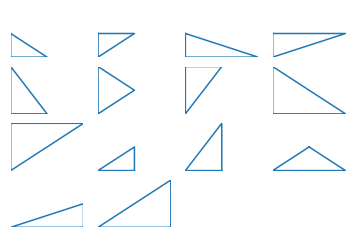

In [150]:
plotRights()

# Problem 3 - TrianglePaths

# define strToLists 
- converts string form of triangle data into nested lists

In [191]:
def strToLists(string):
    lines = string.strip().split('\n')
    result = []
    for line in lines:
        nums = line.strip().split(' ')
        new_nums = []
        for n in nums:
            n = int(n)
            new_nums.append(n)
        result.append(new_nums)
    return result

In [192]:
s1='''
   3
  7 4
 2 4 6
'''
x1 = strToLists(s1)
x1

[[3], [7, 4], [2, 4, 6]]

In [193]:
# from 7, the next element in the path must be 2 or 4
# from 6, 9 or 3
# from 3, 8 or 5

s2='''
   3
  7 4
 2 4 6
8 5 9 3
'''
x2 = strToLists(s2)
x2

[[3], [7, 4], [2, 4, 6], [8, 5, 9, 3]]

In [242]:
s3 = '''
                   75
                 95 64
                17 47 82
              18 35 87 10
             20 04 82 47 65
            19 01 23 75 03 34
          88 02 77 73 07 63 67
         99 65 04 28 06 16 70 92
        41 41 26 56 83 40 80 70 33
       41 48 72 33 47 32 37 16 94 29
      53 71 44 65 25 43 91 52 97 51 14
     70 11 33 28 77 73 17 78 39 68 17 57
    91 71 52 38 17 14 91 43 58 50 27 29 48
  63 66 04 68 89 53 67 30 73 16 69 87 40 31
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23
'''

x3 = strToLists(s3)
x3

[[75],
 [95, 64],
 [17, 47, 82],
 [18, 35, 87, 10],
 [20, 4, 82, 47, 65],
 [19, 1, 23, 75, 3, 34],
 [88, 2, 77, 73, 7, 63, 67],
 [99, 65, 4, 28, 6, 16, 70, 92],
 [41, 41, 26, 56, 83, 40, 80, 70, 33],
 [41, 48, 72, 33, 47, 32, 37, 16, 94, 29],
 [53, 71, 44, 65, 25, 43, 91, 52, 97, 51, 14],
 [70, 11, 33, 28, 77, 73, 17, 78, 39, 68, 17, 57],
 [91, 71, 52, 38, 17, 14, 91, 43, 58, 50, 27, 29, 48],
 [63, 66, 4, 68, 89, 53, 67, 30, 73, 16, 69, 87, 40, 31],
 [4, 62, 98, 27, 23, 9, 70, 98, 73, 93, 38, 53, 60, 4, 23]]

# define maxTrianglePathSum 
- a triangle path csn be defined by going from top to bottom, choosing one element from each row, such that the choice in the next row is to the immediate left or right of the element in the row above
    - in the triangle below 3-7-4-9, 3-4-4-9, 3-4-6-2 are paths
        - the sum of a path is the sum of the elements in the path
        - sums of the above paths are 23, 20, 15
    - 3-7-6-3, 3-4-2-8, 3-7-2-9 are not paths
- maxTrianglePathSum takes the output of strToLists and returns the max possible path sum
- note - you do NOT need to find the actual path, just the max sum
- hint: this is very simple
    - keep merging the last row of the triangle into the 2nd to last row, until you are done
    - you may find it convenient to make a copy of the input, use [copy.deepcopy](https://docs.python.org/3.5/library/copy.html)
    - don't need recursion
- in triangle below, the max sum is 3+7+4+9=23

```
   3
  7 4
 2 4 6
8 5 9 3
```

In [243]:
from copy import deepcopy
def maxTrianglePathSum(x):
    cp = deepcopy(x)
    cp.reverse()
    x.reverse()
    for r in range(len(x)):
        for i in range(len(x[r])):
            num = cp[r][i]
            try:
                nxt = cp[r][i+1]
            except:
                nxt = 0
            if num > nxt:
                try:
                    cp[r+1][i] += num
                except Exception:
                    break
            else:
                try:
                    cp[r+1][i] += nxt
                except Exception:
                    break
                    
    return cp[-1][-1]

hint: the solution to 

```
         1
      2      3
1000     0      1
```

is 1+2+1000, not 1+3+1

so moving top to bottom and making the optimal choice at each level doesn't work

In [244]:
[maxTrianglePathSum(x) for x in [x1, x2, x3]]

[6, 3, 1074]

# Problem 4&5 - Conway's game of Life
- glance at [wiki article](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)
    - many interesting patterns have been discovered
- methods:
    - the ```__init__()``` method takes as input a nested list and converts it to a n x n numpy array of 1s and 0s, representing the cell states. A cell is considered alive if it is of state 1, and dead otherwise.
    - the ```next(self)``` method operates on the current board, and returns the next state of the board as determined by the following rules:
        - If a cell is alive, and it has exactly two or three neighbors that are alive, it will remain alive.
        - If a cell is alive and it has less than two or more than three alive neighbors, it will die.
        - If a cell is dead and it has exactly three neighbors which are alive, it will come back to life. Otherwise, it remains dead.
    - countAliveNeighbors(self, i, j) method counts the number of alive neighbors at (i, j)
        - The neighbors of a cell are any of the cells that are adjacent to it
            - 3 at a corner 
            - 5 on an edge 
            - 8 in the interior. 
- you must complete the ```next()``` and ```countAliveNeighbors()``` methods

In [63]:
# hint - numpy arrays have a copy method

import numpy as np
from copy import deepcopy

a = np.array([2,3])
b = a.copy()
[a,b, a is b]

[array([2, 3]), array([2, 3]), False]

In [79]:
class life:
    def __init__(self, board):
        # current board - will be updated by __next__
        self.current = np.array(board)
        self.side = len(board)
    
    def run(self, n):
        self.plife()
        for j in range(n):
            self.next()
            self.plife()

    def plife(self):
        s = []
        for row in range(self.side):
            for col in range(self.side):
                s.append('1' if self.current[row,col] else '0')
            s.append('\n')
        print(''.join(s))
        
    def next(self):
        # your code here
        cp = deepcopy(self.current)
        for i in range(self.side):
            for j in range(self.side):
                pt = self.current[i, j]
                n = self.countAliveNeighbors(i, j)
                if pt:
                    if n > 3:
                        cp[i, j] = 0
                    elif n < 2:
                        cp[i, j] = 0
                    else:
                        cp[i, j] = 1
                else:
                    if n == 3:
                        cp[i, j] = 1
                        
        self.current = cp
                        
    def countAliveNeighbors(self, i, j):
        # your code here
        count = 0
        ADJACENTS = {(-1, 1), (0, 1), (1, 1), (-1, 0),\
                     (1, 0), (-1, -1), (0,-1), (1,-1)}
        
        for dy, dx in ADJACENTS:

            if 0 <= i+dy < self.side and 0 <= j+dx < self.side:
                try:
                    if self.current[i+dy, j+dx]:
                        count += 1
                except IndexError:
                    print('IndexError')
        return count

In [80]:
# stable, doesn't change

block = life([[0,0,0,0],
             [0,1,1,0],
             [0,1,1,0],
             [0,0,0,0]])

In [81]:
block.countAliveNeighbors(1,1)

3

In [82]:
block.run(2)

0000
0110
0110
0000

0000
0110
0110
0000

0000
0110
0110
0000



In [83]:
# aternates between two patterns

blinker = life([[0, 1, 0],
          [0, 1, 0],
          [0, 1, 0]])

blinker.run(4)

010
010
010

000
111
000

010
010
010

000
111
000

010
010
010



In [84]:
blinker = life([[0, 1, 0 ],
          [0, 1, 0],
          [0, 1, 0]])
blinker.countAliveNeighbors(1,0)

3

In [85]:
toad = life(np.array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]]))

toad.run(2)

000000
000000
001110
011100
000000
000000

000000
000100
010010
010010
001000
000000

000000
000000
001110
011100
000000
000000



In [86]:
everybodydies = life(np.array([
            [1,1,1,0,1],
            [1,0,0,1,0],
            [0,1,0,0,1],
            [1,1,0,1,0],
            [1,0,1,0,1],
            ]))
everybodydies.run(16)

11101
10010
01001
11010
10101

11110
10011
01011
10011
10110

11111
10000
11000
10000
01111

11110
00010
11000
10010
01110

01110
00010
11100
10010
01110

00110
10010
11110
10010
01110

00110
10001
10011
10001
01110

00010
01101
11011
10001
01110

00110
11001
10001
10001
01110

01110
11101
10011
10101
01110

10010
10001
10001
10001
01110

00000
11011
11011
10101
01110

00000
11011
00000
10001
01110

00000
00000
11011
01110
01110

00000
00000
11011
00000
01010

00000
00000
00000
11011
00000

00000
00000
00000
00000
00000



In [87]:
fig8 = life(np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

fig8.run(8)

000000000000
000000000000
000000000000
000111000000
000111000000
000111000000
000000111000
000000111000
000000111000
000000000000
000000000000
000000000000

000000000000
000000000000
000010000000
000101000000
001000100000
000100010000
000010001000
000001000100
000000101000
000000010000
000000000000
000000000000

000000000000
000000000000
000010000000
000111000000
001110100000
000100010000
000010001000
000001011100
000000111000
000000010000
000000000000
000000000000

000000000000
000000000000
000111000000
001000000000
001000100000
001001010000
000010100100
000001000100
000000000100
000000111000
000000000000
000000000000

000000000000
000010000000
000110000000
001011000000
011100100000
000101010000
000010101000
000001001110
000000110100
000000011000
000000010000
000000000000

000000000000
000110000000
000000000000
010001000000
010000100000
000101010000
000010101000
000001000010
000000100010
000000000000
000000011000
000000000000

000000000000
000000000000
000010000000
000000000000
001011